# Podstawy Sztucznej Inteligencji
## Ćwiczenie 4
### Sztuczne Sieci Neuronowe typu „Feed-Forward” jako uniwersalne aproksymator.

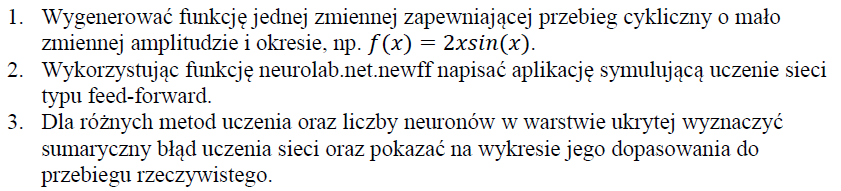

In [1]:
import neurolab as nl
from neurolab import train
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def neural_network(x, y1 , epochs, show, goal, neurons, method):
    wsp = np.abs(max(y1)-min(y1))
    y = y1/wsp

    size = len(x)

    inp = x.reshape(size, 1)
    tar = y.reshape(size, 1)

    net = nl.net.newff([[min(x), max(x)]], [neurons, 1])

    net.trainf = method
    error = net.train(inp, tar, epochs=epochs, show=show,  goal=goal)
    plt.plot(error)
    plt.legend(['Error through epochs'])
    plt.show()
    out = net.sim(inp)

    x2 = np.linspace(min(x), max(x), 150)
    y2 = net.sim(x2.reshape(x2.size, 1)).reshape(x2.size)
    y3 = out.reshape(size)
    plt.plot(x, y, "g")
    plt.plot(x2, y2, "r")
    plt.legend(['train target', 'net output'])
    plt.show()
    return error

Epoch: 40; Error: 0.3078712584357868;
The maximum number of train epochs is reached


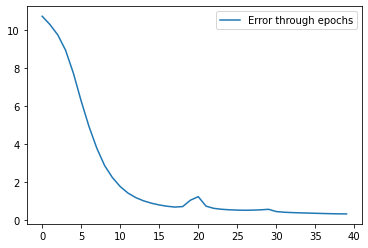

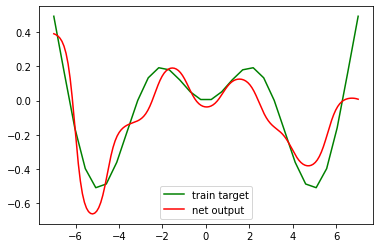

In [3]:
x = np.linspace(-7, 7, 30)
y = 2*x*np.sin(x)
error = neural_network(x, y, epochs=40, show=40, goal=0.001, neurons=10, method = nl.train.train_gda)

Epoch: 100; Error: 0.0268513150231973;
The maximum number of train epochs is reached


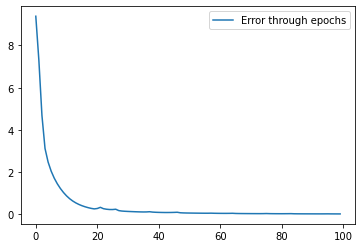

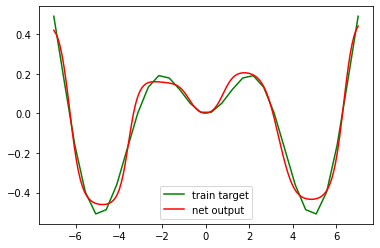

In [4]:
error = neural_network(x, y, epochs=100, show=100, goal=0.001, neurons=10, method = nl.train.train_gda)

Epoch: 500; Error: 1.8103079973955183;
The maximum number of train epochs is reached


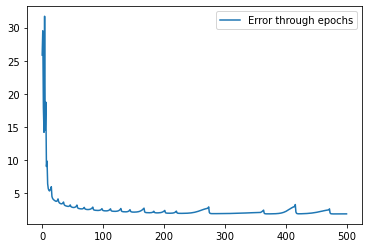

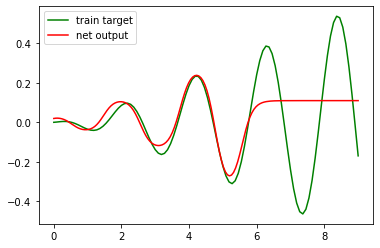

In [5]:
x = np.linspace(0, 9, 100)
y = 2*x**(1/3)*np.sin(x/10)*np.cos(3*x)
error = neural_network(x, y, epochs=500, show=500, goal=0.001, neurons = 10, method = nl.train.train_gda)

Epoch: 200; Error: 17.22385461756379;
The maximum number of train epochs is reached


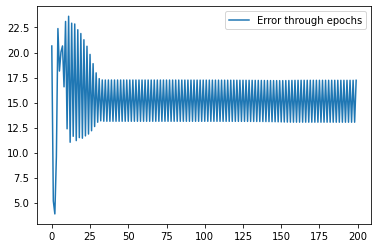

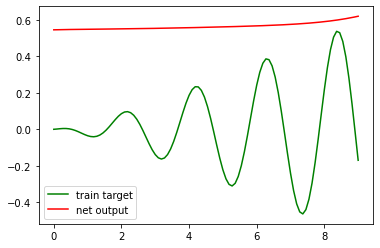

Epoch: 200; Error: 13.152585111885864;
The maximum number of train epochs is reached


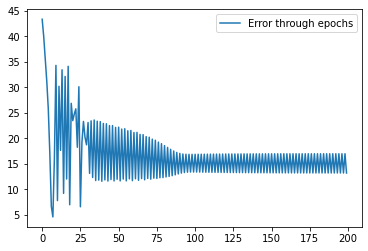

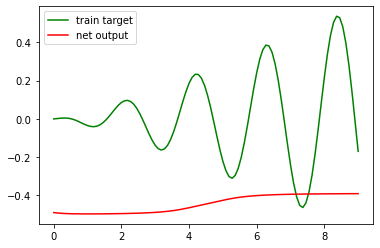

Epoch: 200; Error: 35.3046858368322;
The maximum number of train epochs is reached


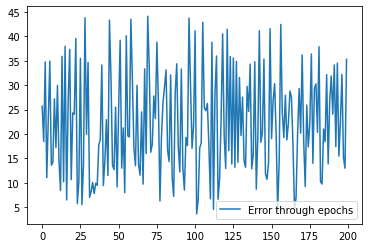

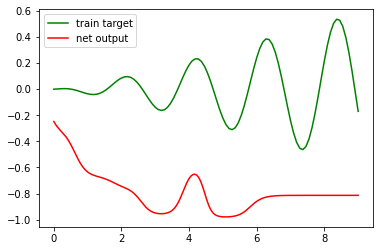

Epoch: 200; Error: 43.958515712461235;
The maximum number of train epochs is reached


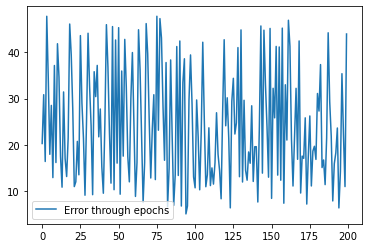

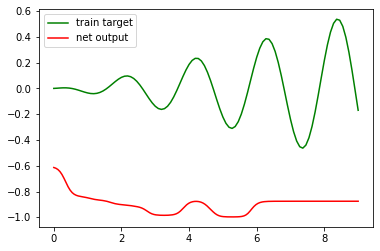

Epoch: 200; Error: 20.505935264682602;
The maximum number of train epochs is reached


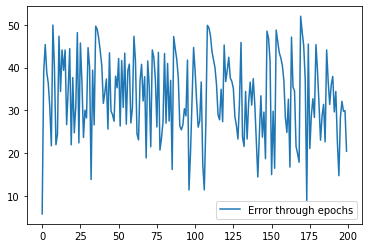

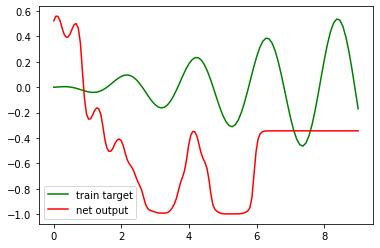

Epoch: 200; Error: 26.583193364400536;
The maximum number of train epochs is reached


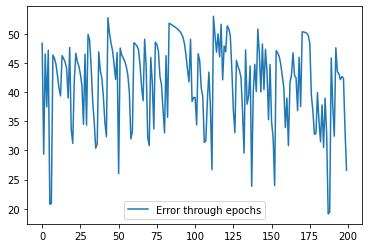

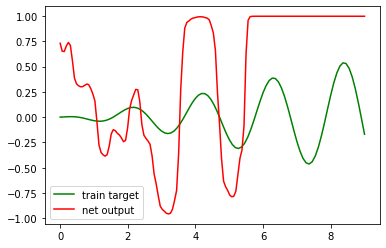

Epoch: 200; Error: 2.4184221932310943;
The maximum number of train epochs is reached


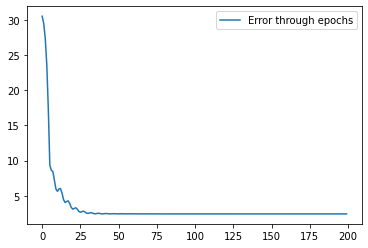

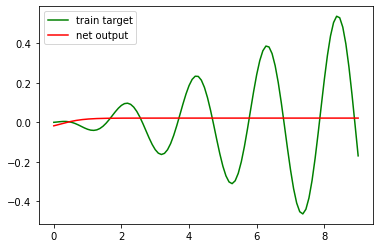

Epoch: 200; Error: 2.342062673356321;
The maximum number of train epochs is reached


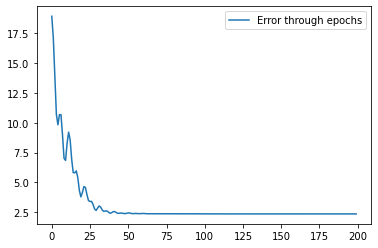

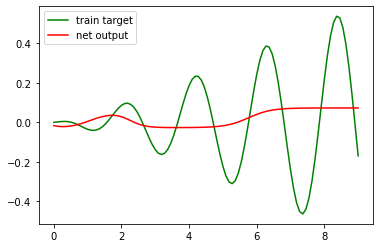

Epoch: 200; Error: 1.8201812229823116;
The maximum number of train epochs is reached


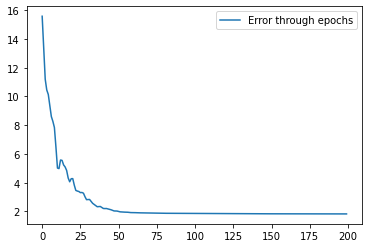

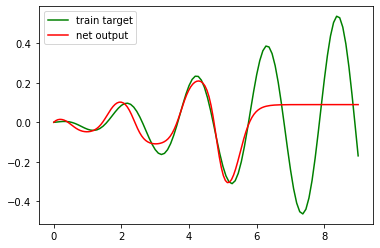

Epoch: 200; Error: 1.7771858809059446;
The maximum number of train epochs is reached


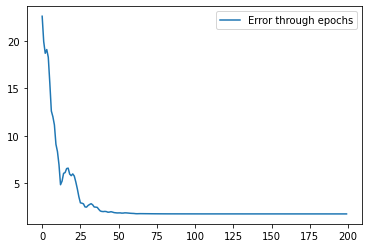

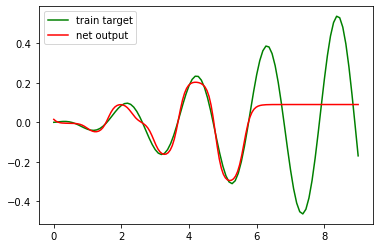

Epoch: 200; Error: 1.7626011017097882;
The maximum number of train epochs is reached


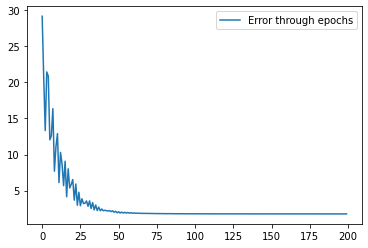

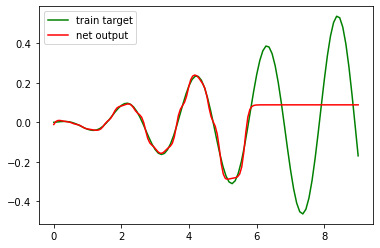

Epoch: 200; Error: 1.7837673406397456;
The maximum number of train epochs is reached


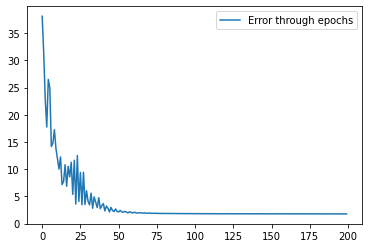

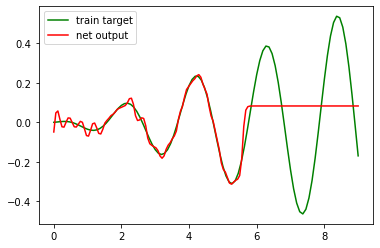

Epoch: 200; Error: 2.587321828427237;
The maximum number of train epochs is reached


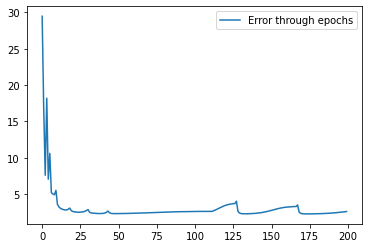

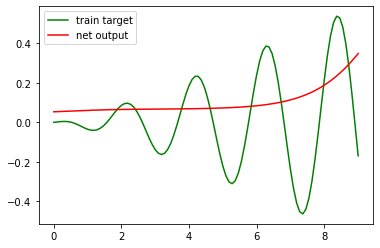

Epoch: 200; Error: 2.8575494036506752;
The maximum number of train epochs is reached


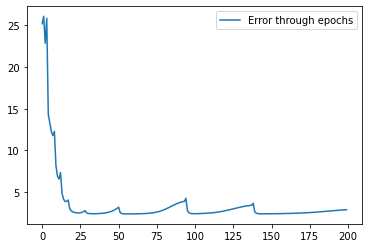

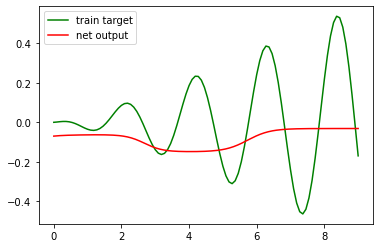

Epoch: 200; Error: 1.9575966560513018;
The maximum number of train epochs is reached


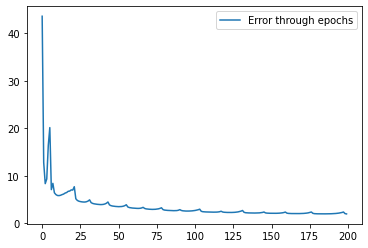

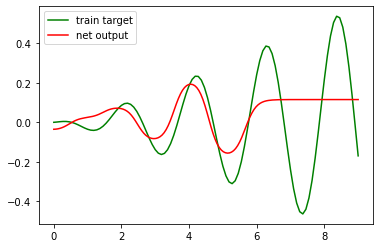

Epoch: 200; Error: 1.9571293140761223;
The maximum number of train epochs is reached


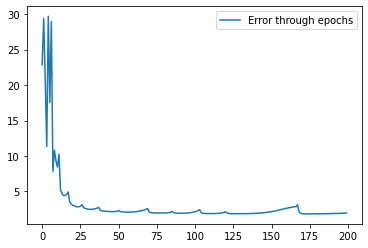

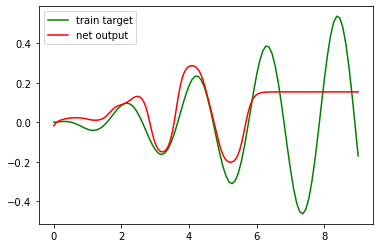

Epoch: 200; Error: 2.130109655894301;
The maximum number of train epochs is reached


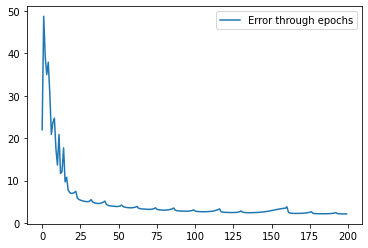

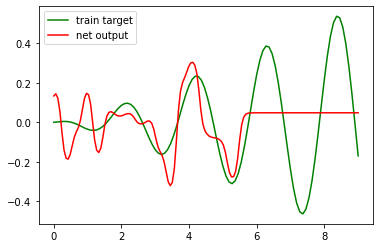

Epoch: 200; Error: 2.130939689593387;
The maximum number of train epochs is reached


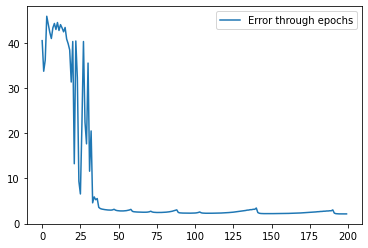

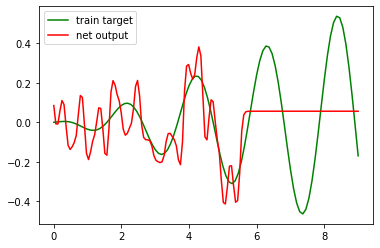

Epoch: 200; Error: 2.4155417076120775;
The maximum number of train epochs is reached


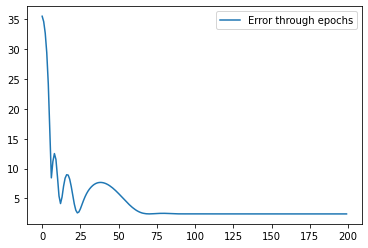

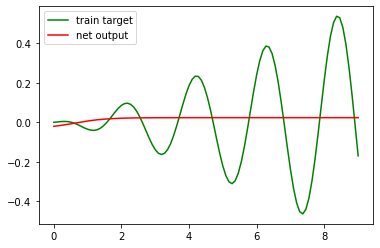

Epoch: 200; Error: 2.3445069257844207;
The maximum number of train epochs is reached


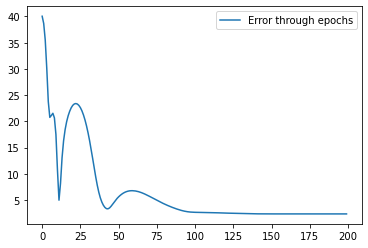

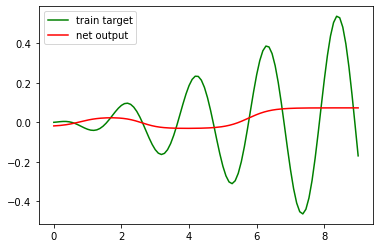

Epoch: 200; Error: 1.7880404117296105;
The maximum number of train epochs is reached


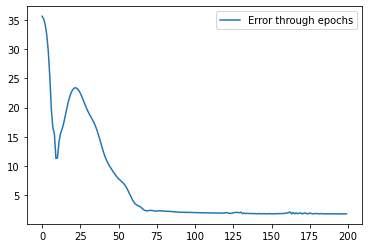

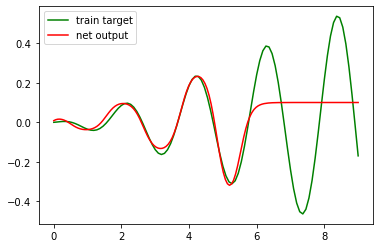

Epoch: 200; Error: 1.7787907915330894;
The maximum number of train epochs is reached


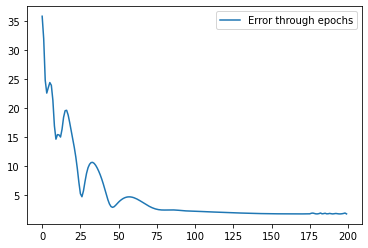

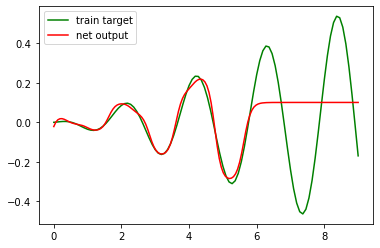

Epoch: 200; Error: 1.7679325365840262;
The maximum number of train epochs is reached


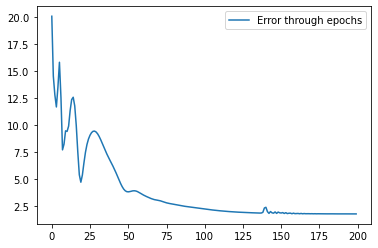

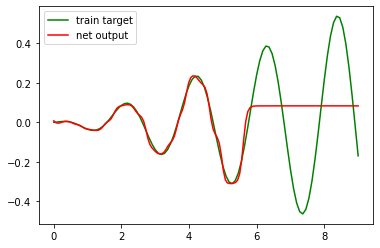

Epoch: 200; Error: 2.1763888472099895;
The maximum number of train epochs is reached


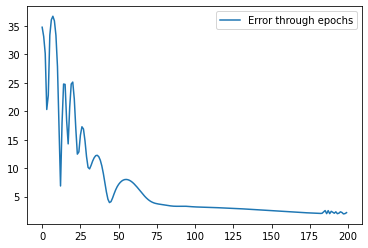

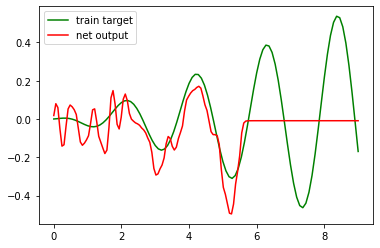

Epoch: 200; Error: 2.362967551906631;
The maximum number of train epochs is reached


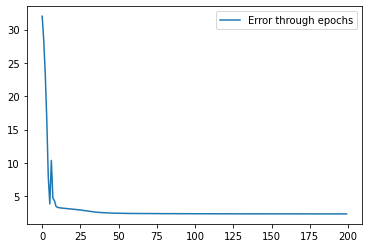

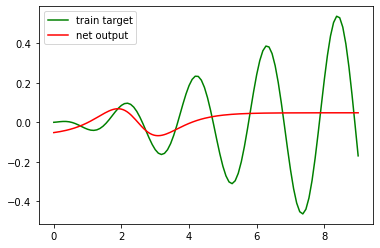

Epoch: 200; Error: 2.372136679473029;
The maximum number of train epochs is reached


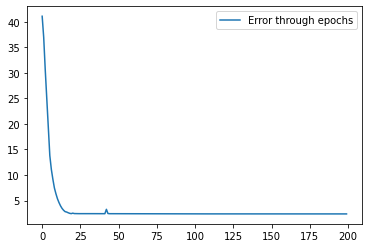

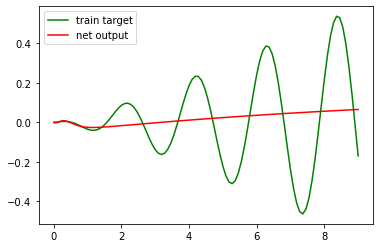

Epoch: 200; Error: 1.7817556155329575;
The maximum number of train epochs is reached


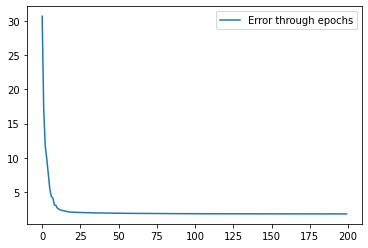

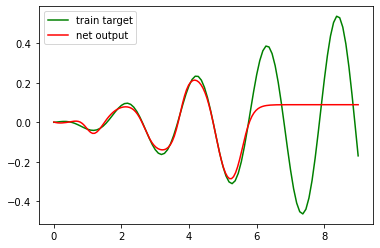

Epoch: 200; Error: 1.5303721230624068;
The maximum number of train epochs is reached


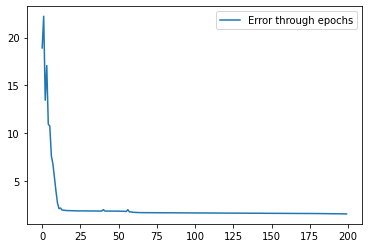

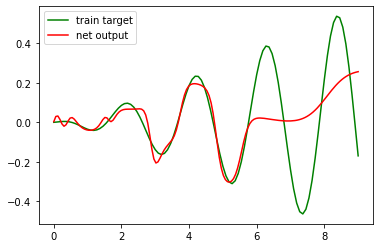

Epoch: 200; Error: 1.770247862928362;
The maximum number of train epochs is reached


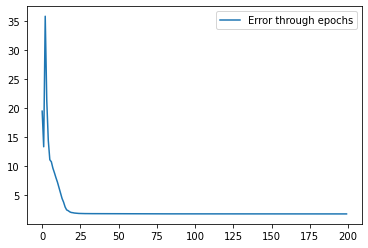

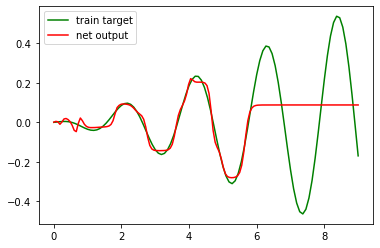

Epoch: 200; Error: 1.767317528248081;
The maximum number of train epochs is reached


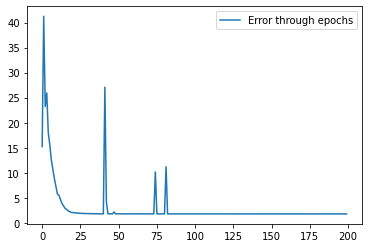

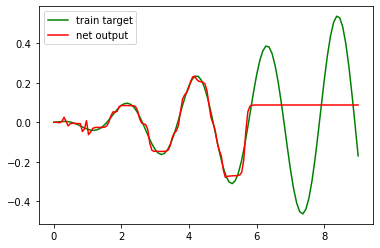

In [6]:
neurons = [3, 5, 10, 15, 30, 50]
methods = [nl.train.train_gd, nl.train.train_gdm, nl.train.train_gda, nl.train.train_gdx, nl.train.train_rprop]
results = []
for method in methods:
    for neuron in neurons:
        error = neural_network(x, y, epochs=200, show=200, goal=0.001, neurons = neuron, method = method)
        results.append((method, neuron, error[-1]))

#### Poniżej posortowane wyniki dla wszystkich możliwości:

In [7]:
results.sort(key=lambda x: x[2])
for result in results:
    print(str(result[0]), " ", result[1], " neurons. Error: ", result[2])

Trainer(TrainRprop)   15  neurons. Error:  1.5303721230624068
Trainer(TrainGDM)   30  neurons. Error:  1.7626011017097882
Trainer(TrainRprop)   50  neurons. Error:  1.767317528248081
Trainer(TrainGDX)   30  neurons. Error:  1.7679325365840262
Trainer(TrainRprop)   30  neurons. Error:  1.770247862928362
Trainer(TrainGDM)   15  neurons. Error:  1.7771858809059446
Trainer(TrainGDX)   15  neurons. Error:  1.7787907915330894
Trainer(TrainRprop)   10  neurons. Error:  1.7817556155329575
Trainer(TrainGDM)   50  neurons. Error:  1.7837673406397456
Trainer(TrainGDX)   10  neurons. Error:  1.7880404117296105
Trainer(TrainGDM)   10  neurons. Error:  1.8201812229823116
Trainer(TrainGDA)   15  neurons. Error:  1.9571293140761223
Trainer(TrainGDA)   10  neurons. Error:  1.9575966560513018
Trainer(TrainGDA)   30  neurons. Error:  2.130109655894301
Trainer(TrainGDA)   50  neurons. Error:  2.130939689593387
Trainer(TrainGDX)   50  neurons. Error:  2.1763888472099895
Trainer(TrainGDM)   5  neurons. Erro

Najlepszy wynik daje meotda  Trainer(TrainRprop)  przy  15  neuronach
Epoch: 200; Error: 1.7883431548577102;
The maximum number of train epochs is reached


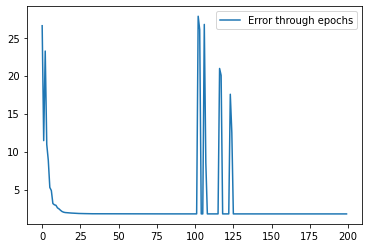

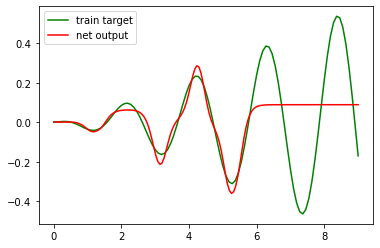

In [8]:
print("Najlepszy wynik daje meotda ", str(results[0][0]), " przy ", results[0][1], " neuronach")
error = neural_network(x, y, epochs=200, show=200, goal=0.001, neurons = results[0][1], method = results[0][0])

## Wniosek: Im bardziej nieregularna funkcja tym trudniej nauczyć sieć neuronową.